# 数据分析实操模拟测试题
---

**试题说明：**

- 测试时间：8小时
- 测试环境：juypter notebook
- 测试要求：所有操作命令或代码均在此notebook文件中编写，完整的Python程序可新建为扩展名为.py的文本文件，然后在本notebook中使用命令或者以引入模块的方式调用执行。程序运行结果必须在此notebook中输出，具体输出方法可见题目中的**操作说明**。


## 一、基础知识题

### 数据描述

1. 用户用电数据表"data/user_power.csv"保存了3个用户（UserA, UserB, UserC）的月用电量数据
2. 线路线损数据表"data/ele_loss.csv"保存了某时期线路线损和用电量数据
3. 线路告警数据表"data/alarm.csv"保存了某时期线路告警信息

各数据文件及其字段说明，请查看[数据特征说明](data/data_desc.htm)

### 题目要求

请使用**numpy**、**pandas**、**matplotlib**（**禁用第三方绘图包**）和**scipy**根据每小题的**具体要求**编程完成相应操作。

#### 第1题（难易程度：* ，本题禁用**pandas**）

将**线路线损数据表**按照月份拆分为3个表，并以csv格式存储。其中分割后文件中的数据顺序、结构和表头与原文件保持一致，每个文件以"1-yyyy-mm.csv"的形式保存（如1-2010-10.csv）。

In [145]:
# 操作代码
import numpy as np

loss_arr = np.genfromtxt('data/ele_loss.csv', dtype=None, delimiter=',', names=True, encoding='utf-8')

def find_split_indices(arr):
    indices = []
    prev_month = ''
    for i, date_str in enumerate(arr['date']):
        if date_str.split('/')[1] != prev_month:
            prev_month = date_str.split('/')[1]
            indices.append(i)
    return indices[1:]

split_indices = find_split_indices(loss_arr)
splits = np.split(loss_arr, split_indices)

field_names = loss_arr.dtype.names
header = ','.join(field_names)

for arr in splits:
    date = arr[0][1].split('/')
    fname = '1-{}-{}.csv'.format(date[0],date[1])
    np.savetxt(fname, arr, fmt='%s', delimiter=',', header=header, comments='')

#### 第2题 （难易程度：* ,   本题禁用pandas）

绘制**线路线损数据表**9月份**用电量（ele）**和**线损（loss）**数据的**趋势图（线图）**，其中横坐标为精确到天的日期，纵坐标为用电量和线损数值，标题为"9月份用电量和线损情况"，图例分别为"用电量"和"线损"。图表保存为"2.png"文件。

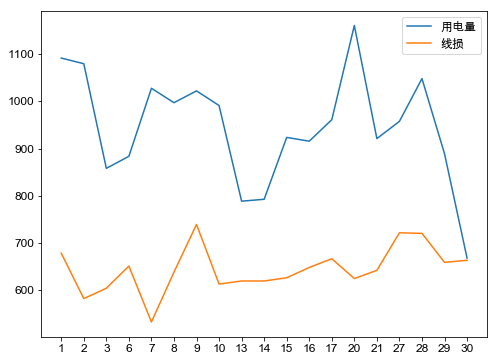

In [468]:
# 操作代码
data = splits[0]

scale = 4000

x = [d[7:] for d in data['date']]
y_ele = data['ele']
y_loss = data['loss'] * scale

plt.figure(figsize=(8, 6))
plt.rc('font', size=12)
plt.plot(x, y_ele, label='用电量')
plt.plot(x, y_loss, label='线损')

plt.legend()

plt.show()

#### 第3题 （难易程度：* ，本题禁用pandas)

对**线路告警数据表**中的**警告提示（alarm）**按照下表对应关系编码为**警告级别（alarm_level）**，并作为新增列"**alarm_level**"。修改后的数据保存为"3.csv"文件。

|警告提示|警告级别|
|---|---|
|C相电流过负荷|1|
|A相电流过负荷|2|
|电流不平衡|3|
|电压断相|4|

In [180]:
# 操作代码
alarm_arr = np.loadtxt('data/alarm.csv', delimiter=',', dtype='str', encoding='utf-8')

level_dict = {'C相电流过负荷':1, 'A相电流过负荷':2, '电流不平衡':3, '电压缺相':4, '电压断相':5}
alarm_level = np.array(['alarm_level'] + [level_dict[k] for k in alarm_arr[1:, 2]])

alarm_arr = np.hstack((alarm_arr, alarm_level.reshape(-1,1)))
np.savetxt('3.csv', alarm_arr, fmt='%s', delimiter=',')

#### 第4题 （难易程度：* ，本题禁用pandas）

对**线路告警数据表**中的不同**警告提示（alarm）**的**发生次数**进行统计并绘制**柱状图**，其中横坐标为**警告提示**，纵坐标为**发生次数**，标题为"线路告警发生次数统计"。图表保存为"4.png"文件。

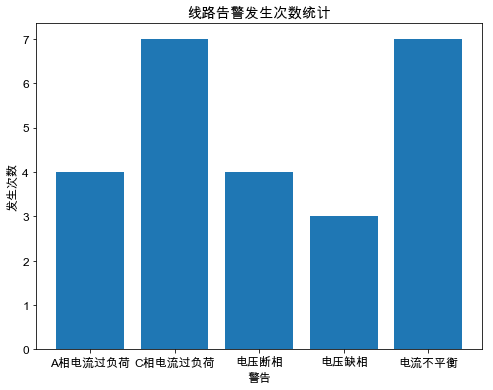

In [470]:
# 操作代码
alarms, counts = np.unique(alarm_arr[1:, 2], return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(alarms, counts)

plt.xlabel('警告')
plt.ylabel('发生次数')

plt.title('线路告警发生次数统计')
plt.savefig('4.png')
plt.show()

#### 第5题（难易程度：** ）

1. **用户用电数据表**中存在**缺失值**，请对其进行**拉格朗日插值**填充，修改后的数据保存为"5-1.csv"文件，数据结构与原文件一致。

In [244]:
# 操作代码
import pandas as pd
from scipy.interpolate import lagrange
user_power = pd.read_csv('data/user_power.csv')

def interpolate_fillna(series):
    x = series[series.notna()].index.values
    y = series[series.notna()].values
    ploy = lagrange(x, y)
    
    inter_values = ploy(series[series.isna()].index.values)
    series[series.isna()] = inter_values
    return inter_values

print(user_power)
ua_max = user_power['UserA'].max()
ua_min = user_power['UserA'].min()
ua_iv = interpolate_fillna(user_power['UserA'])
print(ua_max, ua_min, ua_iv)

ub_max = user_power['UserB'].max()
ub_min = user_power['UserB'].min()
ub_iv = interpolate_fillna(user_power['UserB'])
print(ub_max, ub_min, ub_iv)

uc_max = user_power['UserC'].max()
uc_min = user_power['UserC'].min()
uc_iv = interpolate_fillna(user_power['UserC'])
print(uc_max, uc_min, uc_iv)

print(user_power)

       UserA     UserB     UserC
0   235.8333  324.0343  478.3231
1   236.2708  325.6379  515.4564
2   238.0521  328.0897  517.0909
3   235.9063       NaN  514.8900
4   236.7604  268.8324       NaN
5        NaN  404.0480  486.0912
6   237.4167  391.2652  516.2330
7   238.6563  380.8241       NaN
8   237.6042  388.0230  435.3508
9   238.0313  206.4349  487.6750
10  235.0729       NaN       NaN
11  235.5313  400.0787  660.2347
12       NaN  411.2069  621.2346
13  234.4688  395.2343  611.3408
14  235.5000  344.8221  643.0863
15  235.6354  385.6432  642.3482
16  234.5521  401.6234       NaN
17  236.0000  409.6489  602.9347
18  235.2396  416.8795  589.3457
19  235.4896       NaN  556.3452
20  236.9688       NaN  538.3470
238.6563 234.4688 [224.82362466 236.86154825]
416.8795 206.4349 [ 1.61971831e+03  2.17555992e+02 -7.94294127e+05 -1.20871392e+07]
660.2347 435.3508 [519.13106539 491.79295259 613.42631844 622.28275487]
         UserA         UserB       UserC
0   235.833300  3.240343e+02  4

In [246]:
user_power['UserB'][user_power['UserB'] < ub_min]

19   -7.942941e+05
20   -1.208714e+07
Name: UserB, dtype: float64

In [247]:
user_power['UserB'][user_power['UserB'] > ub_max]

3    1619.718311
Name: UserB, dtype: float64

In [248]:
# UserB的插值异常,分别使用最小和最大值重新填充
user_power['UserB'][user_power['UserB'] < ub_min] = ub_min
user_power['UserB'][user_power['UserB'] > ub_max] = ub_max
user_power

,UserA,UserB,UserC
0,235.833300,324.034300,478.323100
1,236.270800,325.637900,515.456400
2,238.052100,328.089700,517.090900
3,235.906300,416.879500,514.890000
4,236.760400,268.832400,519.131065
5,224.823625,404.048000,486.091200
6,237.416700,391.265200,516.233000
7,238.656300,380.824100,491.792953
8,237.604200,388.023000,435.350800
9,238.031300,206.434900,487.675000


2. 在第5-1小题操作的基础上，绘制**用户用电数据表**中3个用户的用电趋势图，其中横坐标为**月次**，纵坐标为**用电量**，标题为"用户用电量趋势图",图例为3个用户的用户名。图表保存为"5-2.png"文件。

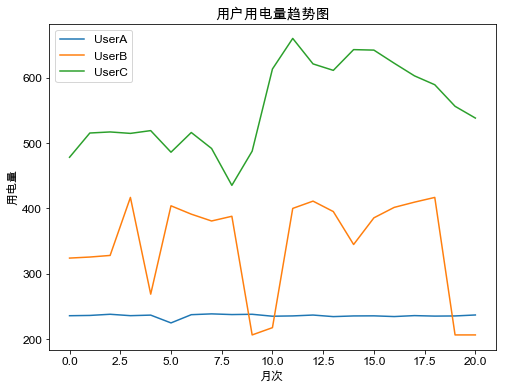

In [471]:
# 操作代码
plt.figure(figsize=(8, 6))

for col in user_power.columns:
    plt.plot(user_power[col], label=col)

plt.xlabel('月次')
plt.ylabel('用电量')
plt.title('用户用电量趋势图')
plt.legend()
plt.savefig('5-2.png')
plt.show()

3. 在第5-1小题操作的基础上，统计**用户用电数据表**中3个用户的用电比例，并绘制饼图，标题为"用户用电比例"。图表保存为"5-3.png"文件。

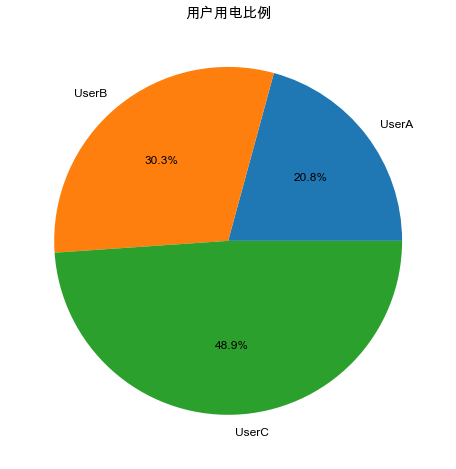

In [472]:
# 操作代码
plt.figure(figsize=(8,8))
plt.pie(user_power.sum().values, labels=user_power.columns, autopct='%3.1f%%')

plt.title('用户用电比例')
plt.savefig('5-3.png')

plt.show()

#### 第6题 （难易程度：**）

在第5-1小题操作的基础上：

1. 统计**用户用电数据表**中每个用户的总用电量、平均用电量、最大用电量、最小用电量，并以csv格式输出，形式见下表。输出结果保存为"6-1.csv"文件。

|用户|最小用电量|最大用电量|平均用电量|总用电量|
|---|---|---|---|---|
|XXX|###.###|###.###|###.###|###.###|
|XXX|###.###|###.###|###.###|###.###|
|...|...|...|...|...|

In [267]:
# 操作代码
stats =pd.DataFrame({
    '用户': user_power.columns, 
    '最小用电量': user_power.min().values,
    '最大用电量': user_power.max().values,
    '平均用电量': user_power.mean().values,
    '总用电量': user_power.sum().values
})

stats.to_csv('6-1.csv', index=False)
stats

,用户,最小用电量,最大用电量,平均用电量,总用电量
0,UserA,224.823625,238.6563,235.746432,4950.675073
1,UserB,206.434900,416.8795,344.268181,7229.631792
2,UserC,435.350800,660.2347,555.379081,11662.960691


2. 在同一图表中绘制**用户用电数据表**中每个用户用电量的**箱线图**，并输出每个用户用电量的**中位数**、**上四分位数**、**下四分位数**和**异常值**（如果有的话）。

UserA的用电量统计:
中位数：235.91
上四分位：236.97
下四分位：235.49
异常值：224.82
UserB的用电量统计:
中位数：385.64
上四分位：401.62
下四分位：324.03
异常值：206.43
UserC的用电量统计:
中位数：538.35
上四分位：613.43
下四分位：514.89
异常值：nan


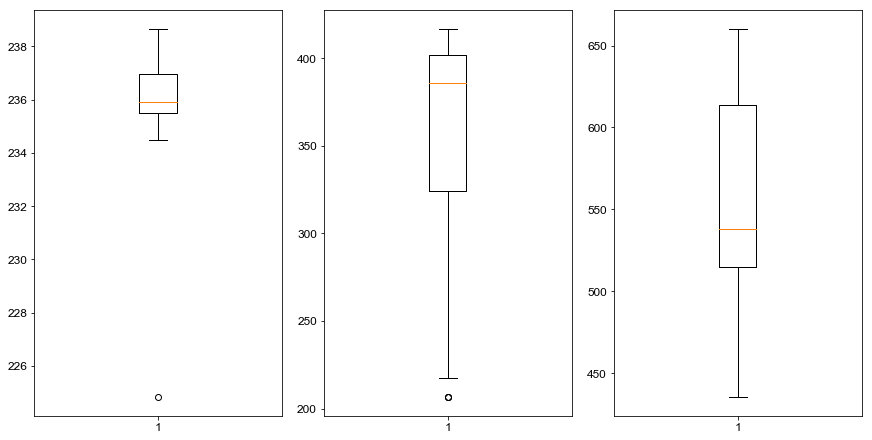

In [475]:
# 操作代码
fig,axs = plt.subplots(ncols=user_power.shape[1], constrained_layout=True, figsize=(12, 6))

def print_stats(p, name):   
    print('{}的用电量统计:'.format(name))
    print('中位数：{:.2f}'.format(p['medians'][0].get_ydata()[0]))
    print('上四分位：{:.2f}'.format(p['boxes'][0].get_ydata()[2]))
    print('下四分位：{:.2f}'.format(p['boxes'][0].get_ydata()[0]))
    flier_value = p['fliers'][0].get_ydata()[0] if len(p['fliers'][0].get_ydata()) > 0 else np.nan
    print('异常值：{:.2f}'.format(flier_value))

for i, col in enumerate(user_power.columns):
    p = axs[i].boxplot(user_power[col])
    print_stats(p, col)
    
plt.show()

3. 对**用户用电数据表**用电量进行归一化\[0,1\]处理，并绘制**热力图**，其中横坐标为归一化的每月用电数据，纵坐标为用户名，标题为"用户用电热力图"。图表保存为"6-3.png"文件。

In [315]:
# 操作代码
def normalize(data):
    data = (data - data.min()) / (data.max() - data.min())
    return data

norm_data = normalize(user_power.values).T

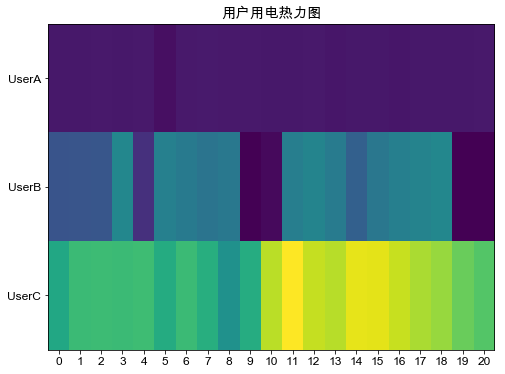

In [473]:
plt.figure(figsize = (8,6))

plt.imshow(norm_data, aspect='auto')

plt.yticks([0,1,2], labels=user_power.columns)
plt.xticks(user_power.index.values)
plt.title('用户用电热力图')
plt.savefig('6-3.png')

plt.show()

#### 第7题（难易程度：** ）

在第3题操作的基础上：

1. 将**线路线损数据表**和**线路告警数据表**以**线路编号（ID）**和**日期（Date）**两个键值作为主键进行**内连接**。连接后的数据保存为"7-线路状态表-1.csv"文件。

In [403]:
# 操作代码
loss_df = pd.read_csv('data/ele_loss.csv')
loss_df['ID'] = loss_df['ID'].astype('str')
alarm_df = pd.DataFrame(alarm_arr[1:], columns=alarm_arr[0])
alarm_df.dtypes, loss_df.dtypes

loss_alarm = pd.merge(loss_df, alarm_df, how='inner', left_on=['ID', 'date'], right_on=['ID', 'date'])
loss_alarm.to_csv('7-线路状态表-1.csv')
loss_alarm

,ID,date,ele,loss,alarm,alarm_level
0,21261001,2010/9/3,858.0,0.151048,电流不平衡,3
1,21261001,2010/9/6,883.5,0.162778,C相电流过负荷,1
2,21261001,2010/9/16,915.5,0.162028,C相电流过负荷,1
3,21261001,2010/9/16,915.5,0.162028,C相电流过负荷,1
4,21261001,2010/9/17,961.0,0.166650,A相电流过负荷,2
5,21261001,2010/9/17,961.0,0.166650,电流不平衡,3


2. 将连接后**线路状态表**的**警告级别（alarm_level）**列进行**one-hot编码**处理，处理后的新列代替原来的**警告提示（alarm）**和**警告级别（alarm_level）**列。修改后**线路状态表**保存为"7-线路状态表-2.csv"文件。

In [406]:
# 操作代码
loss_alarm2 = loss_alarm.drop(columns='alarm')
loss_alarm3 = pd.get_dummies(loss_alarm2, columns=['alarm_level'])
loss_alarm3.to_csv('7-线路状态表-2.csv')
loss_alarm3

,ID,date,ele,loss,alarm_level_1,alarm_level_2,alarm_level_3
0,21261001,2010/9/3,858.0,0.151048,0,0,1
1,21261001,2010/9/6,883.5,0.162778,1,0,0
2,21261001,2010/9/16,915.5,0.162028,1,0,0
3,21261001,2010/9/16,915.5,0.162028,1,0,0
4,21261001,2010/9/17,961.0,0.166650,0,1,0
5,21261001,2010/9/17,961.0,0.166650,0,0,1


3. 计算**线路线损数据表**中**用电量（ele）**和**线损（loss）**两列数据的**相关系数**，并绘制**曲线图**，其中横坐标为用电量，纵坐标为线损值，标题为"用电量和线损关系图"。相关系数保存为"7-3.csv"文件，图表保存为"7-3.png"文件。

In [412]:
# 操作代码
ele_loss_corr = loss_df.corr()
ele_loss_corr.to_csv('7-3.csv')
ele_loss_corr

,ele,loss
ele,1.000000,-0.772628
loss,-0.772628,1.000000


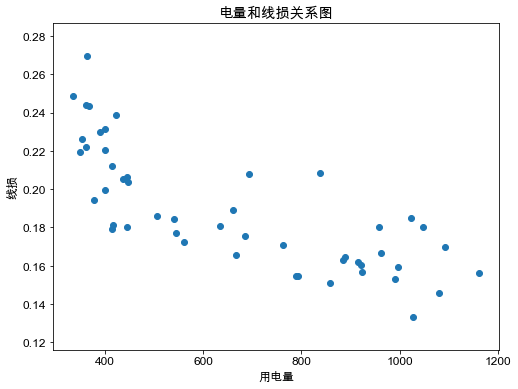

In [474]:
plt.figure(figsize=(8,6))
# 此处修正一下，应该绘制散点图
plt.scatter(loss_df['ele'], loss_df['loss'])

plt.xlabel('用电量')
plt.ylabel('线损')
plt.title('电量和线损关系图')

plt.savefig('7-3.png')
plt.show()

#### 第8题（难易程度：** ）

在第3题操作的基础上：

1. 将**线路线损数据表**和**线路告警数据表**以**线路编号（ID）**和**日期（Date）**两个键值作为主键进行**左连接**。连接后的新表保存为“8-线路状态表-1.csv"文件。

In [477]:
# 操作代码
line_status = pd.merge(loss_df, alarm_df, how='left', left_on=['ID', 'date'], right_on=['ID', 'date'])
line_status.to_csv('8-线路状态表-1.csv')
line_status

,ID,date,ele,loss,alarm,alarm_level
0,21261001,2010/9/1,1091.5,0.169615,NaN,NaN
1,21261001,2010/9/2,1079.5,0.145556,NaN,NaN
2,21261001,2010/9/3,858.0,0.151048,电流不平衡,3
3,21261001,2010/9/6,883.5,0.162778,C相电流过负荷,1
4,21261001,2010/9/7,1027.5,0.133186,NaN,NaN
5,21261001,2010/9/8,997.0,0.159571,NaN,NaN
6,21261001,2010/9/9,1022.0,0.184799,NaN,NaN
7,21261001,2010/9/10,991.0,0.153268,NaN,NaN
8,21261001,2010/9/13,788.5,0.154878,NaN,NaN
9,21261001,2010/9/14,792.5,0.154881,NaN,NaN


2. 对**左连接**后的**线路状态表**通过绘制缺失值的**热图**进行缺失值检测，并对缺失值进行填充，缺失的**警告提示（alarm）**填充为"**正常**",相应缺失的**警告级别（alarm_level）**填充为**0**。修改后的数据保存为"8-线路状态表-2.csv"文件。

In [478]:
# 定义热图绘制函数
def plot_heatmap(data, ax, cmap='Reds_r', xlabel_rot='vertical'):
    xlabels = data.columns.values    
    X = data.values
    
    ax.imshow(X, aspect='auto', cmap=cmap)
    ax.set_xticklabels(xlabels, rotation=xlabel_rot)
    ax.set_xticks(range(len(xlabels)))
    for k in ax.spines:
        ax.spines[k].set_visible(False)

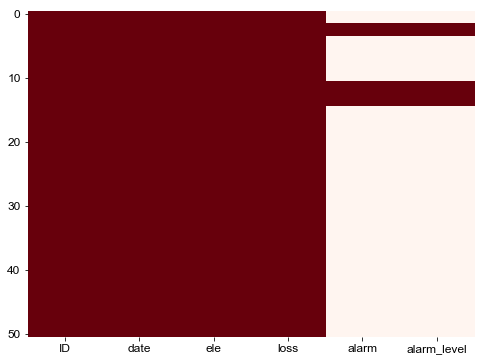

In [479]:
# 操作代码
plt.figure(figsize=(8, 6))

plot_heatmap(line_status.isna(), plt.gca(), xlabel_rot=0)

plt.show()

In [431]:
line_status2 = line_status.copy()
line_status2['alarm'].fillna('正常', inplace=True)
line_status2['alarm_level'].fillna(0, inplace=True)
line_status2.to_csv('8-线路状态表-2.csv')
line_status2.head(10)

,ID,date,ele,loss,alarm,alarm_level
0,21261001,2010/9/1,1091.5,0.169615,正常,0
1,21261001,2010/9/2,1079.5,0.145556,正常,0
2,21261001,2010/9/3,858.0,0.151048,电流不平衡,3
3,21261001,2010/9/6,883.5,0.162778,C相电流过负荷,1
4,21261001,2010/9/7,1027.5,0.133186,正常,0
5,21261001,2010/9/8,997.0,0.159571,正常,0
6,21261001,2010/9/9,1022.0,0.184799,正常,0
7,21261001,2010/9/10,991.0,0.153268,正常,0
8,21261001,2010/9/13,788.5,0.154878,正常,0
9,21261001,2010/9/14,792.5,0.154881,正常,0


3. 在上述操作的基础上，统计**线路状态表2**中不同**警告提示（alarm）**下的总用电量、平均用电量和平均线损，并分别绘制**平均用电量**和**平均线损**的**柱状图**，其中横坐标均为**警告提示**，横坐标分别为**平均用电量**和**平均线损**，标题分别为"线损-告警"和"用电-告警"。图表标题为"线路线损告警图",保存为"8-3.png"文件。

In [442]:
# 操作代码
ele_loss_stats = pd.concat((
    line_status2.groupby('alarm').mean().rename(columns={'ele':'平均用电量', 'loss': '平均线损'}),
    line_status2.groupby('alarm').sum()['ele']),
    axis=1)
ele_loss_stats = ele_loss_stats.rename(columns={'ele':'总用电量'})
ele_loss_stats.rename_axis('警告', axis='index')

,平均用电量,平均线损,总用电量
警告,,,
A相电流过负荷,961.000000,0.166650,961.0
C相电流过负荷,904.833333,0.162278,2714.5
正常,637.755556,0.191734,28699.0
电流不平衡,909.500000,0.158849,1819.0


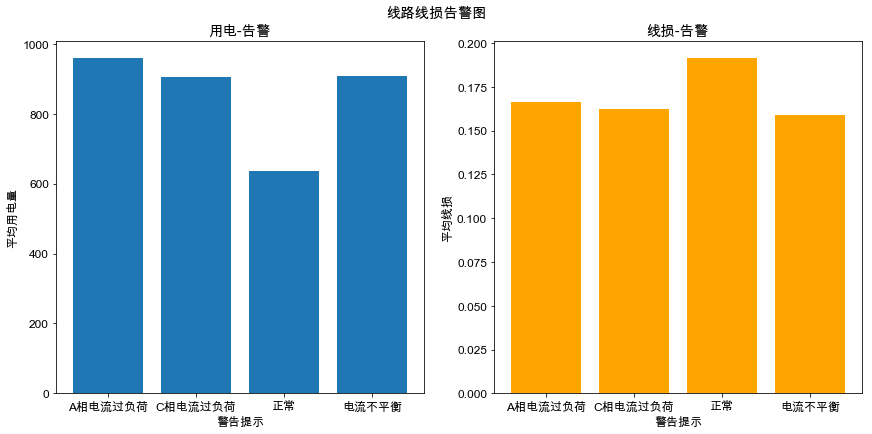

In [482]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(12,6), constrained_layout=True)

ax1.bar(ele_loss_stats.index,ele_loss_stats['平均用电量'])
#ax1.set_xticklabels(labels=ele_loss_stats.index, rotation='vertical')
ax1.set_xlabel('警告提示')
ax1.set_ylabel('平均用电量')
ax1.set_title('用电-告警')

ax2.bar(ele_loss_stats.index,ele_loss_stats['平均线损'], color='orange')
#ax2.set_xticklabels(labels=ele_loss_stats.index, rotation='vertical')
ax2.set_xlabel('警告提示')
ax2.set_ylabel('平均线损')
ax2.set_title('线损-告警')

plt.suptitle('线路线损告警图')
plt.savefig('8-3.png')

plt.show()

## 二、综合题

### 乳腺癌数据分析与预测

`sklearn`库的`datasets`模块集成了数据分析的经典数据集，其中**乳腺癌数据集（breast_cancer）**可通过该模块的`load_breast_cancer()`函数加载。加载后的数据集相当于一个字典，可通过`data`、`target`、`target_names`、`feature_names`、`DESCR`分别获取数据集的数据、标签、特征名称和描述信息。

请编程完成以下数据分析任务：

#### 第1题 （难易程度：* ）

1. 导入并查看**乳腺癌数据集**对象的描述信息，输出数据集的特征名称、标签名、标签和数据的形状与类型；

In [1]:
# 操作代码
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR[:3036])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
print('特征名称:\n',cancer.feature_names)
print('标签名称：', cancer.target_names)
print('标签形状：', cancer.target.shape)
print('数据形状：', cancer.data.shape)
print('数据类型：', cancer.data.dtype)
print('标签类型：', cancer.data.dtype)

特征名称:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
标签名称： ['malignant' 'benign']
标签形状： (569,)
数据形状： (569, 30)
数据类型： float64
标签类型： float64


2. 统计数据集中恶性（maligant）实例和良性（benign）实例的数量，并绘制饼图，标题为"乳腺癌良性和恶性占比"；

In [9]:
# 操作代码
import numpy as np
benign_count = np.sum(cancer.target)
maligant_count = len(cancer.target) - benign_count
maligant_count, benign_count

(212, 357)

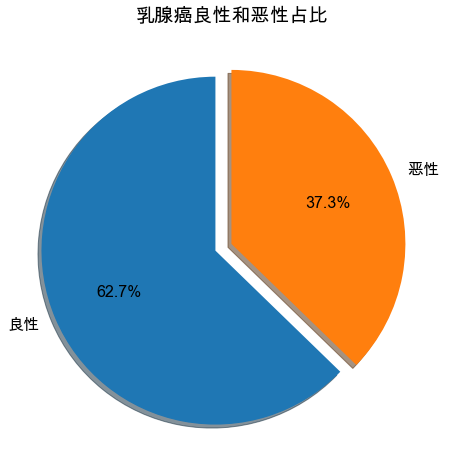

In [483]:
# 绘图
import matplotlib.pyplot as plt

labels = ['良性', '恶性']
data = [benign_count, maligant_count]

plt.figure(figsize=(8, 8))
plt.rc('font', size=16, family='Arial Unicode MS')

plt.pie(data, explode=[0.1, 0], labels=labels, autopct='%3.1f%%', startangle=90, shadow=True)

plt.title('乳腺癌良性和恶性占比')

plt.show()

3. 创建**乳腺癌数据集**的**DataFrame**，列名由特征名称（feature_names）、标签（target）和标签名（target_names）构成，并且将特征名中的空格替换为下划线，输出描述性统计信息，结果保存为"1-breast_cancer.csv"文件。

In [47]:
# 操作代码
import pandas as pd
# 列名
columns = np.char.replace(cancer.feature_names, ' ', '_')
columns = np.append(columns, 'target')
columns = np.append(columns,'target_category')
# 目标分类
target_categories = cancer.target_names[cancer.target]
# 水平拼接
data = np.hstack((cancer.data, cancer.target.reshape(-1,1), target_categories.reshape(-1,1)))
# 创建DataFrame
breast_cancer_df = pd.DataFrame(data, columns=columns)
breast_cancer_df.to_csv('1-breast_cancer.csv')
breast_cancer_df.describe().T

,count,unique,top,freq
mean_radius,569,456,12.34,4
mean_texture,569,479,16.84,3
mean_perimeter,569,522,82.61,3
mean_area,569,539,512.2,3
mean_smoothness,569,474,0.1007,5
mean_compactness,569,537,0.1206,3
mean_concavity,569,537,0.0,13
mean_concave_points,569,542,0.0,13
mean_symmetry,569,432,0.1717,4
mean_fractal_dimension,569,499,0.05667,3


#### 第2题（难易程度：**）

1. 将**乳腺癌数据集**的数据按照8:2的比例划分为**训练集**和**测试集**，分别输出其形状；

In [49]:
# 操作代码
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)
print('训练集特征的形状:', X_train.shape)
print('训练集标签的形状:', y_train.shape)
print('测试集特征的形状:', X_test.shape)
print('测试集标签的形状:', y_test.shape)

训练集特征的形状: (455, 30)
训练集标签的形状: (455,)
测试集特征的形状: (114, 30)
测试集标签的形状: (114,)


2. 分别对**训练集**和**测试集**进行\[0,1\]归一化处理，并输出归一化前后的**最大**和**最小值**；

In [59]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler_train = MinMaxScaler().fit(X_train)
scaler_test = MinMaxScaler().fit(X_test)

X_train_scaled = scaler_train.transform(X_train)
X_test_scaled = scaler_test.transform(X_test)

print('归一化前训练集数据的最小值:', np.min(X_train))
print('归一化后训练集数据的最小值:', np.min(X_train_scaled))
print('归一化前训练集数据的最大值:', np.max(X_train))
print('归一化后训练集数据的最大值:', np.max(X_train_scaled))

print('归一化前测试集数据的最小值:', np.min(X_test))
print('归一化后测试集数据的最小值:', np.min(X_test_scaled))
print('归一化前测试集数据的最大值:', np.max(X_test))
print('归一化后测试集数据的最大值:', np.max(X_test_scaled))

归一化前训练集数据的最小值: 0.0
归一化后训练集数据的最小值: 0.0
归一化前训练集数据的最大值: 4254.0
归一化后训练集数据的最大值: 1.0000000000000002
归一化前测试集数据的最小值: 0.0
归一化后测试集数据的最小值: 0.0
归一化前测试集数据的最大值: 3432.0
归一化后测试集数据的最大值: 1.0000000000000002


3. 分别对归一化后的**训练集**和**测试集**进行**PCA降维**，使特征数降为10。

In [60]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components=10)
pca_model.fit(X_train_scaled)

X_train_pca = pca_model.transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

print('PCA降维后训练集特征的形状:', X_train_pca.shape)
print('PCA降维后测试集特征的形状:', X_test_pca.shape)

PCA降维后训练集特征的形状: (455, 10)
PCA降维后测试集特征的形状: (114, 10)


#### 第3题（难易程度：***）

1. 构建sklearn**支持向量机**分类模型，并训练模型，输出模型信息。

In [62]:
# 操作代码
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')
svc_model.fit(X_train_pca, y_train)
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

2. 使用训练好的模型对**测试集**进行预测，并以输出前20个预测结果的**标签名称**

In [68]:
y_pred = svc_model.predict(X_test_pca)
cancer.target_names[y_pred[:20]]

array(['benign', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'malignant', 'malignant', 'malignant', 'benign',
       'benign', 'malignant', 'benign', 'malignant', 'benign',
       'malignant', 'benign', 'benign', 'benign', 'malignant'],
      dtype='<U9')

3. 计算预测**正确**和预测**错误**的结果**数量**以及**正确率**

In [69]:
true_count = np.sum(y_pred == y_test)

print('预测正确数:', true_count)
print('预测错误数:', len(y_test) - true_count)
print('预测正确率:', true_count / len(y_test))

预测正确数: 110
预测错误数: 4
预测正确率: 0.9649122807017544


4. 评价模型，输出模型预测的**准确率（Accuracy）**、**精确率（Precision）**、**召回率（Recall）**、**F1值**和**Cohen's Kappa系数**，并绘制**ROC曲线**。

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

print('准确率:', accuracy_score(y_test, y_pred))
print('精确率:', precision_score(y_test, y_pred))
print('召回率:', recall_score(y_test, y_pred))
print('F1值:', f1_score(y_test, y_pred))
print("Cohen's Kappa 系数:", cohen_kappa_score(y_test, y_pred))

准确率: 0.9649122807017544
精确率: 0.9855072463768116
召回率: 0.9577464788732394
F1值: 0.9714285714285714
Cohen's Kappa 系数: 0.9259980525803311


In [73]:
# 或者
from sklearn.metrics import classification_report
print('-'*20 + '分类模型评价报告' + '-'*20)
print(classification_report(y_test, y_pred))

--------------------分类模型评价报告--------------------
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



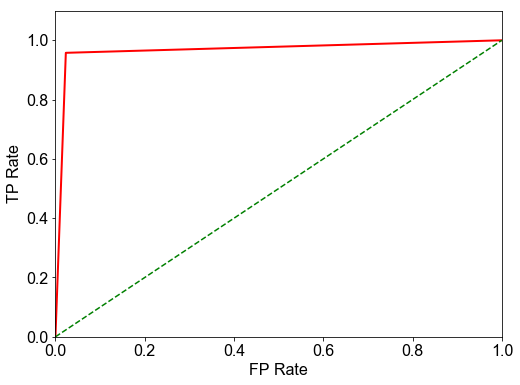

In [76]:
# 绘制ROC曲线
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.xlim(0,1)
plt.ylim(0.0, 1.1)

plt.xlabel('FP Rate')
plt.ylabel('TP Rate')

plt.plot(fpr, tpr, lw=2, ls='-', c='red')
plt.plot([0,1], 'g--')
plt.show()

#### 第4题（难易程度：*** ）

1. 构建sklearn**逻辑回归**、**支持向量机**和**朴素贝叶斯**分类器模型；
2. 并按照子训练集大小从10依次递增（增量为25）到整个训练集大小的顺序多次（迭代）**训练和评估**上述三个模型，记录每个迭代周期三个模型预测结果的**准确率**；
3. 绘制三个模型预测准确率的**线图**，以比较不同训练集大小（递增）三个模型的准确率，图表标题为"逻辑回归、支持向量机和朴素贝叶斯准确率"，横坐标为训练实例数量（子训练集大小），纵坐标为测试准确率，图例分别为逻辑回归、支持向量机和朴素贝叶斯。图表保存为"乳腺癌预测模型准确率比较.png"。

In [88]:
# 操作代码
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

lr_model = LogisticRegression(solver='liblinear')
nb_model = GaussianNB()
sv_model = SVC(gamma='auto')

lr_scores = []
nb_scores = []
sv_scores = []

train_sizes = range(10, len(X_train), 25)

for train_size in train_sizes:
    X_slice, _, y_slice, _ = train_test_split(
        X_train_pca, y_train, 
        train_size=train_size, stratify=y_train,
        random_state=31)
    
    lr_model.fit(X_slice, y_slice)
    lr_scores.append(lr_model.score(X_test_pca, y_test))
    
    nb_model.fit(X_slice, y_slice)
    nb_scores.append(nb_model.score(X_test_pca, y_test))
    
    sv_model.fit(X_slice, y_slice)
    sv_scores.append(sv_model.score(X_test_pca, y_test))

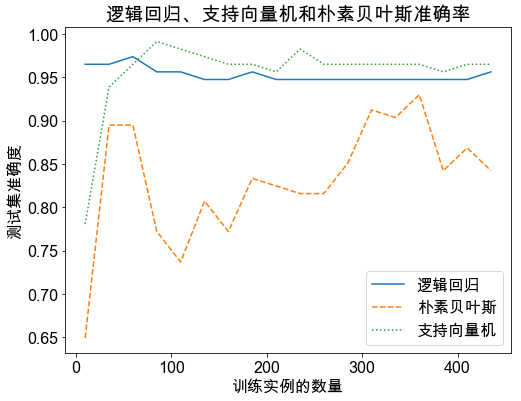

In [89]:
plt.figure(figsize=(8,6))

plt.plot(train_sizes, lr_scores, label='逻辑回归')
plt.plot(train_sizes, nb_scores, ls='--', label='朴素贝叶斯')
plt.plot(train_sizes, sv_scores, ls=':', label='支持向量机')

plt.title('逻辑回归、支持向量机和朴素贝叶斯准确率')
plt.xlabel('训练实例的数量')
plt.ylabel('测试集准确度')

plt.legend()

plt.show()